# Case Ifood
*Desenvolvido por Mário de Deus*

*Adaptado por Nickolas, Marcos e Sandron para o CP1*

# Installs

In [ ]:
# Instalar o numba primeiro, na versão compatível
!pip install numba

# Instalar o shap (caso queira garantir uma versão mais recente)
!pip install shap

!pip install pycaret

!pip install pandas==1.5.3
import importlib
#importlib.reload(pandas)  # Atualiza pandas no runtime, só por garantia


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 88.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4d

In [ ]:
import sklearn
sklearn.__version__

'1.6.1'

# Imports

In [ ]:
import numpy as np
import pandas as pd
import joblib
from pycaret.classification import setup, load_model, evaluate_model
# import seaborn as sns
# import shap

from pycaret.classification import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', 1000)

import warnings
warnings.filterwarnings('ignore')

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# Descrição / Objetivo do problema

* O objetivo

O objetivo da equipe é construir um modelo preditivo que produzirá o maior lucro para a próxima campanha de marketing direto, programada para o próximo mês. A nova campanha, sexta, visa a venda de um novo gadget para clientes cadastrados no Banco de Dados da empresa. Para construir o modelo, foi realizada uma campanha piloto envolvendo 2.240 clientes. Os clientes foram selecionados aleatoriamente e contatados por telefone para a aquisição do gadget. Durante os meses seguintes, os clientes que compraram a oferta foram devidamente etiquetados. O custo total da campanha da amostra foi de 6,720MU e a receita gerada pelos clientes que aceitaram a oferta foi de 3,674MU. Globalmente, a campanha teve um lucro de -3,046MU. A taxa de sucesso da campanha foi de 15%. O objetivo da equipe é desenvolver um modelo que preveja o comportamento do cliente e aplicá-lo ao restante da base de clientes. Felizmente, o modelo permitirá que a empresa escolha a dedo os clientes com maior probabilidade de comprar a oferta, deixando de fora os não respondentes, tornando a próxima campanha altamente lucrativa. Além disso, além de maximizar o lucro da campanha, o CMO está interessado em estudar as características dos clientes que desejam comprar o gadget.
Os dados
O conjunto de dados contém características sociodemográficas e firográficas de cerca de 2.240 clientes contatados. Além disso, contém um sinalizador para aqueles clientes que responderam à campanha, comprando o produto.


# Data Loading

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Google COlab
# df = pd.read_csv('/content/drive/MyDrive/Front End e Mobile Development/2024/20240318 - Aula06/data.csv',encoding='utf-8')

#Jupyter
df = pd.read_csv('data.csv',encoding='utf-8')

df.head()

# Data Cleaning

Drop da feature ID por ser um identificador

In [ ]:
df.drop('ID',axis = 1, inplace = True, errors = 'ignore')
df.shape

## Features com valores unicos
Verificando a existência de features com valores únicos (devem ser dropadas por não contribuirem para a explicar a variação da feature target)

In [ ]:
df.nunique().sort_values()

In [ ]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace = True, errors = 'ignore')

## NaN analysis

In [ ]:
df.isna().sum()

Somente a feature Income possui valores nulos.
Analisando as linhas com valores nulos em relação aos valores da feature target

In [ ]:
#Distribuição da feature Response entre as amostras com Income = NaN
df[df.Income.isna()].Response.value_counts()

In [ ]:
# Proporção de 0 e 1 da feature Response no df completo
df.Response.value_counts(normalize = True)

In [ ]:
print('% amostras com NaN: ',np.round((df.Income.isna().sum()/len(df))*100,2))
print('% amostras com NaN e Response = 1: ',
      np.round((( len(df[(df.Income.isna()) & (df.Response == 1)]) / len(df))*100),2))

Dado que as 24 linhas com valores Nan representam 1% do dataset total, e que entre as 24 linhas com Income == Nan somente uma apresentou Response == 1 (0.04%), as 24 linhas serão dropadas

In [ ]:
print('Shape antes do dropna: ',df.shape[0])
df.dropna(axis=0,inplace = True)
print('Shape após o dropna: ',df.shape[0])

## Ajuste do dtypes

In [ ]:
df = df.convert_dtypes()
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.Response = df.Response.astype('bool')
df.dtypes

# Feature Engineering

## Idade dos clientes

In [ ]:
from datetime import datetime
ano_atual = pd.datetime.now().year
df['Age'] = ano_atual - df.Year_Birth
df.drop('Year_Birth',axis = 1, errors = 'ignore', inplace = True)
df.head()

## Tempo como cliente

In [ ]:
dt = pd.datetime.now().date()
df['Time_Customer'] = dt - pd.to_datetime(df['Dt_Customer']).dt.date
df['Time_Customer'] = df['Time_Customer'] / np.timedelta64(1, 'Y')
print(df[['Dt_Customer','Time_Customer']].head())
df.drop('Dt_Customer',axis = 1, inplace = True)

### Removendo valores incoerentes com a variável Marital_Status

In [ ]:
index_to_drop = df[(df['Marital_Status'] =='YOLO') | (df['Marital_Status'] =='Absurd') | (df['Marital_Status'] =='absurd') | (df['Marital_Status'] == 'Alone')].index
df.drop(index_to_drop,inplace = True)
df = df.reset_index(drop = True)
df.Marital_Status.value_counts()
print(df.shape)

In [ ]:
df.rename(columns={'Response':'z_Response'},inplace = True)
cols = df.columns.sort_values()
df = df[cols]
df.rename(columns={'z_Response':'Response'},inplace = True)

df.columns

# Preparação do dataset para Modelagem


## Train Test Validation Split

In [ ]:
# sample 5% of data to be used as unseen data
df_train_test = df.sample(frac=0.90, random_state=123)
df_valid = df.drop(df_train_test.index)
df_train_test.reset_index(inplace=True, drop=True)
df_valid.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(df_train_test.shape))
print('Unseen Data For Predictions: ' + str(df_valid.shape))

# Auto ML - PYCARET

**Para o problema de negócio em questão, a métrica Precision é a mais relevante.**

In [ ]:
df_train_test.dtypes

,0
AcceptedCmp1,Int64
AcceptedCmp2,Int64
AcceptedCmp3,Int64
AcceptedCmp4,Int64
AcceptedCmp5,Int64
Age,Int64
Complain,Int64
Education,string
Income,Int64
Kidhome,Int64


## Setup

In [ ]:
s = setup(data = df_train_test,
          target = 'Response',
          fix_imbalance = True,
          remove_outliers = True,
          categorical_features = ['Education', 'Marital_Status'],
          session_id = 123)

,Description,Value
0,Session id,123
1,Target,Response
2,Target type,Binary
3,Original data shape,"(2099, 26)"
4,Transformed data shape,"(3072, 34)"
5,Transformed train set shape,"(2442, 34)"
6,Transformed test set shape,"(630, 34)"
7,Numeric features,23
8,Categorical features,2
9,Preprocess,True


In [ ]:
# check available models
#has to be called necessary only after having defined a setup.
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Comparativo entre Modelos

In [ ]:
best_model = compare_models(sort = 'auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8121,0.9005,0.8099,0.4380,0.5669,0.4613,0.4976,0.2660
lda,Linear Discriminant Analysis,0.8128,0.9004,0.8099,0.4389,0.5677,0.4624,0.4985,0.2610
gbc,Gradient Boosting Classifier,0.8741,0.8916,0.4478,0.6165,0.5155,0.4455,0.4548,1.3300
lightgbm,Light Gradient Boosting Machine,0.8727,0.8863,0.3802,0.6329,0.4700,0.4034,0.4229,1.2300
xgboost,Extreme Gradient Boosting,0.8836,0.8862,0.4933,0.6590,0.5573,0.4925,0.5032,0.6290
rf,Random Forest Classifier,0.8836,0.8785,0.3802,0.7094,0.4914,0.4333,0.4618,0.8410
ada,Ada Boost Classifier,0.8632,0.8658,0.5524,0.5535,0.5485,0.4685,0.4711,0.6520
et,Extra Trees Classifier,0.8870,0.8536,0.3798,0.7532,0.5003,0.4448,0.4803,0.5400
qda,Quadratic Discriminant Analysis,0.7661,0.8289,0.6567,0.4162,0.4906,0.3736,0.3891,0.2670
lr,Logistic Regression,0.7447,0.8075,0.7099,0.3356,0.4548,0.3153,0.3540,1.6720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# print(best_model)

## Análise do Modelo

In [ ]:
#evaluate model
# evaluate_model(best_model)

In [ ]:
#plot model - treshold
# plot_model(best_model, plot = 'threshold')

In [ ]:
#plot model - auc
# plot_model(best_model, plot = 'auc')

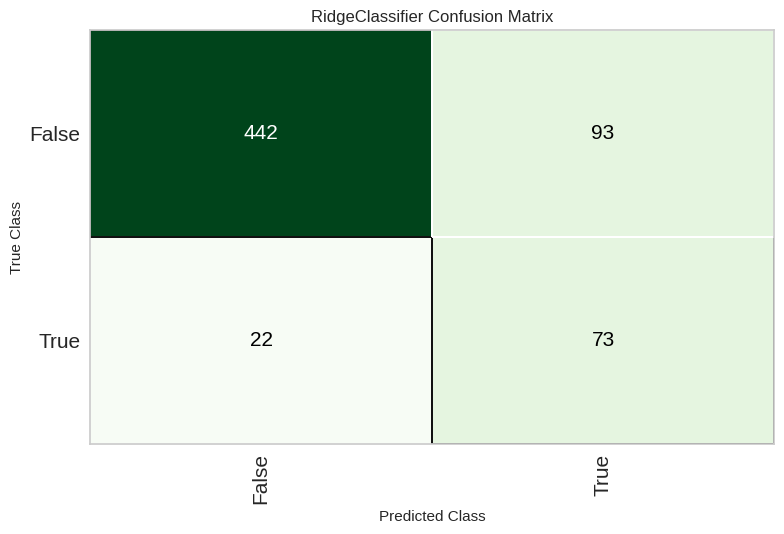

In [ ]:
#plot model - confusion matrix
#plot_model(best_model, plot = 'confusion_matrix')

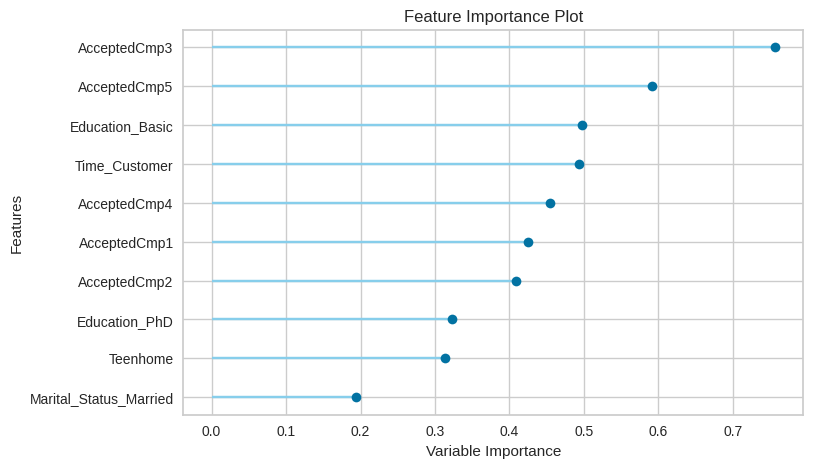

In [ ]:
#plot model - feature
#plot_model(best_model, plot = 'feature')

In [ ]:
#predict model - raw score
#predict_model(best_model, raw_score= True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8175,0.7973,0.7684,0.4398,0.5594,0.4548,0.4830


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response,prediction_label
1869,0,0,0,0,0,66,0,PhD,67786,0,...,6,1,6,3,1,0,0,11.340411,True,1
1782,0,0,0,0,0,61,0,PhD,31686,1,...,0,2,3,1,6,31,1,10.847588,False,0
1944,0,0,0,0,0,75,0,PhD,59292,0,...,5,2,8,3,3,71,1,11.825021,False,0
1670,0,0,1,0,0,55,0,PhD,38097,1,...,2,4,2,3,7,70,1,12.484856,True,1
1219,0,0,0,0,0,49,0,Master,49681,0,...,1,6,7,7,7,66,2,11.430761,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,50,0,Graduation,37085,1,...,0,4,3,3,8,65,1,10.790092,False,0
1923,1,0,0,0,0,60,0,Graduation,81168,0,...,4,1,7,6,3,84,0,10.926987,False,0
1523,0,0,0,0,0,47,0,2n Cycle,52195,2,...,0,1,2,1,8,2,1,10.913298,False,0
641,0,0,0,0,0,56,0,Graduation,4428,0,...,0,0,0,25,1,0,1,11.512899,False,0


* Outros tipos de plot:
https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model

## Criando um Modelo

In [ ]:
#create model rf
mdl_gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8367,0.8771,0.1818,0.4000,0.2500,0.1726,0.1896
1,0.9184,0.9135,0.5909,0.8125,0.6842,0.6387,0.6494
2,0.8912,0.8711,0.4091,0.7500,0.5294,0.4738,0.5017
3,0.8844,0.8785,0.4545,0.6667,0.5405,0.4771,0.4885
4,0.8844,0.9189,0.3636,0.7273,0.4848,0.4278,0.4605
5,0.8776,0.8260,0.3636,0.6667,0.4706,0.4081,0.4321
6,0.8707,0.8682,0.3182,0.6364,0.4242,0.3604,0.3880
7,0.8707,0.8165,0.3182,0.6364,0.4242,0.3604,0.3880
8,0.8912,0.8896,0.3478,0.8889,0.5000,0.4517,0.5149


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tuning dos Hiperparâmetros

### RF

In [ ]:
tuned_gbc = tune_model(mdl_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8647,0.4545,0.5263,0.4878,0.4053,0.4068
1,0.9116,0.9102,0.6818,0.7143,0.6977,0.6459,0.6462
2,0.8844,0.8604,0.5455,0.6316,0.5854,0.5186,0.5205
3,0.8707,0.8705,0.5455,0.5714,0.5581,0.4825,0.4827
4,0.9252,0.9487,0.5909,0.8667,0.7027,0.6616,0.6775
5,0.8503,0.8538,0.4545,0.5000,0.4762,0.3891,0.3897
6,0.8639,0.8840,0.5000,0.5500,0.5238,0.4447,0.4453
7,0.8571,0.8142,0.3636,0.5333,0.4324,0.3540,0.3626
8,0.8980,0.8604,0.5652,0.7222,0.6341,0.5759,0.5817


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#predict rf
#mdl_rf com e sem tuning apresentaram AUC e desvio padrao (STD) praticamente iguais.
predict_model(mdl_gbc, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8746,0.8984,0.3789,0.6429,0.4768,0.4109,0.4295


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response,prediction_label,prediction_score_0,prediction_score_1
1869,0,0,0,0,0,66,0,PhD,67786,0,...,6,3,1,0,0,11.340411,True,0,0.6000,0.4000
1782,0,0,0,0,0,61,0,PhD,31686,1,...,3,1,6,31,1,10.847588,False,0,1.0000,0.0000
1944,0,0,0,0,0,75,0,PhD,59292,0,...,8,3,3,71,1,11.825021,False,0,0.9600,0.0400
1670,0,0,1,0,0,55,0,PhD,38097,1,...,2,3,7,70,1,12.484856,True,0,0.5383,0.4617
1219,0,0,0,0,0,49,0,Master,49681,0,...,7,7,7,66,2,11.430761,False,0,0.9800,0.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,50,0,Graduation,37085,1,...,3,3,8,65,1,10.790092,False,0,0.9950,0.0050
1923,1,0,0,0,0,60,0,Graduation,81168,0,...,7,6,3,84,0,10.926987,False,0,0.8667,0.1333
1523,0,0,0,0,0,47,0,2n Cycle,52195,2,...,2,1,8,2,1,10.913298,False,0,0.9867,0.0133
641,0,0,0,0,0,56,0,Graduation,4428,0,...,0,25,1,0,1,11.512899,False,0,0.8750,0.1250


In [ ]:
print(mdl_gbc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
print(tuned_gbc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
#predict rf
predict_model(tuned_gbc, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8746,0.8984,0.3789,0.6429,0.4768,0.4109,0.4295


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response,prediction_label,prediction_score_0,prediction_score_1
1869,0,0,0,0,0,66,0,PhD,67786,0,...,6,3,1,0,0,11.340411,True,0,0.6000,0.4000
1782,0,0,0,0,0,61,0,PhD,31686,1,...,3,1,6,31,1,10.847588,False,0,1.0000,0.0000
1944,0,0,0,0,0,75,0,PhD,59292,0,...,8,3,3,71,1,11.825021,False,0,0.9600,0.0400
1670,0,0,1,0,0,55,0,PhD,38097,1,...,2,3,7,70,1,12.484856,True,0,0.5383,0.4617
1219,0,0,0,0,0,49,0,Master,49681,0,...,7,7,7,66,2,11.430761,False,0,0.9800,0.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,50,0,Graduation,37085,1,...,3,3,8,65,1,10.790092,False,0,0.9950,0.0050
1923,1,0,0,0,0,60,0,Graduation,81168,0,...,7,6,3,84,0,10.926987,False,0,0.8667,0.1333
1523,0,0,0,0,0,47,0,2n Cycle,52195,2,...,2,1,8,2,1,10.913298,False,0,0.9867,0.0133
641,0,0,0,0,0,56,0,Graduation,4428,0,...,0,25,1,0,1,11.512899,False,0,0.8750,0.1250


## AUC Plot

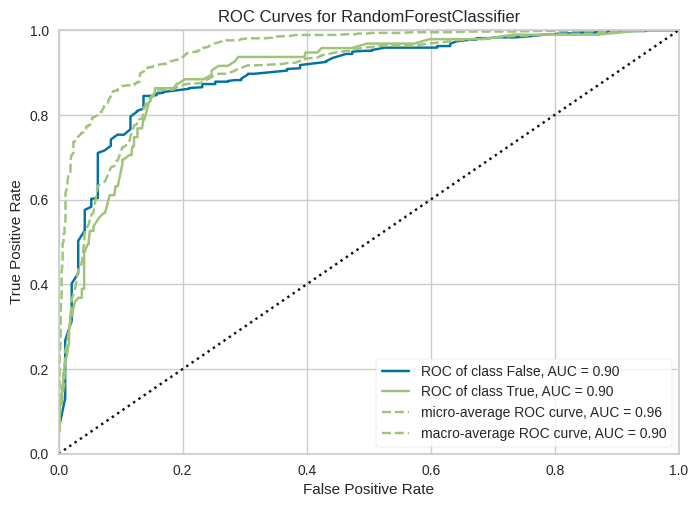

In [ ]:
#auc
#plot_model(tuned_rf, plot = 'auc')

## Feature Importance

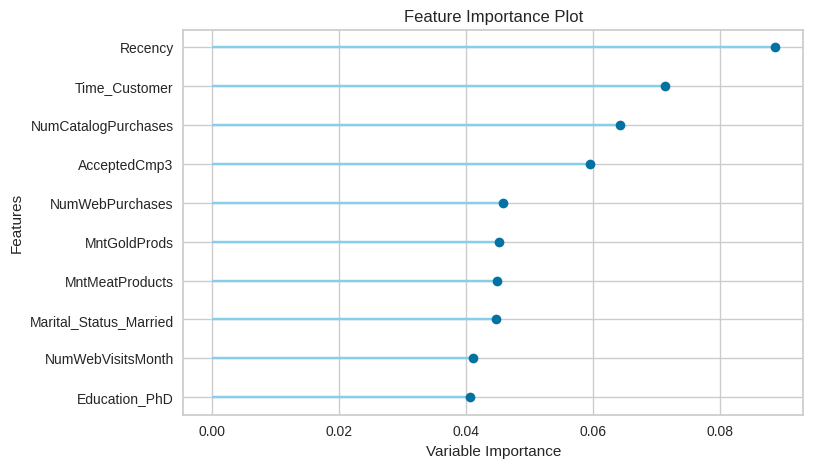

In [ ]:
#feature
#plot_model(tuned_rf, plot = 'feature')

## Matriz de Confusão

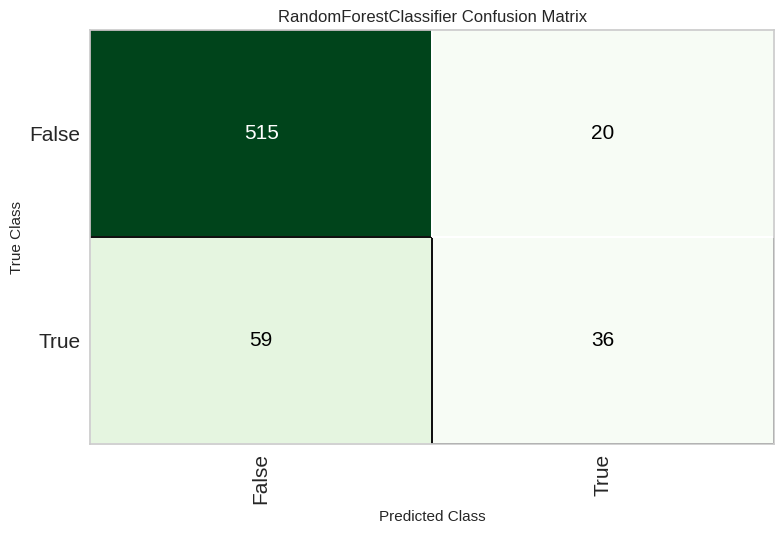

In [ ]:
#confusion matrix
#plot_model(tuned_rf, plot = 'confusion_matrix')

## Save Model

In [ ]:
save_model(mdl_gbc, './deploy/pickle/pickle_gbc_pycaret2')

In [ ]:
cols_x_test = get_config(variable="X_test").columns
cols_x_test

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Age', 'Complain', 'Education', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Teenhome',
       'Time_Customer'],
      dtype='object')

In [ ]:
df_valid.drop('Response', axis = 1).to_csv('Xtest.csv', index = False)

In [ ]:
df_valid

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response
0,0,0,0,0,0,41,0,Graduation,26646,1,...,11,0,2,4,2,6,26,0,11.162447,False
1,0,0,0,0,0,79,0,Graduation,37760,0,...,84,1,2,6,4,7,20,0,12.608062,False
2,0,0,0,0,0,40,0,Master,20559,1,...,13,0,2,3,2,8,88,0,12.079646,False
3,0,0,0,0,0,68,0,Graduation,65486,0,...,245,2,1,10,4,2,29,1,10.913297,False
4,0,0,0,0,0,61,0,Master,79143,0,...,650,9,1,13,6,3,2,0,12.662820,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,47,0,Basic,26487,1,...,2,1,3,3,2,5,23,0,11.890730,False
106,0,0,0,0,0,42,0,Master,89616,0,...,671,5,1,12,7,2,36,0,12.120714,True
107,0,0,0,0,0,78,0,Graduation,27469,0,...,9,0,1,3,0,6,2,0,12.687461,False
108,0,0,0,0,0,30,0,2n Cycle,80617,0,...,594,6,1,8,4,2,42,0,12.493070,False
